# **데이터 전처리**

In [1]:
pip install sklearn

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

In [4]:
np.column_stack(([1,2,3],[4,5,6]))
# column_stack은 전달받은 리스트를 일려로 세운 후 차례대로 나란히 연결

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
# 타깃 데이터 만들기

In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
# ones와 zeros는 각각 원하는 개수의 1과 0을 채운 배열을 만들어줌 위와 같음

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# train_test_split 에는 자체적으로 랜덤 시드를 지정할 수 있는 random_state 매개변수가 있음

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [13]:
# 위 함수는 기본적으로 25%를 테스트 세트로 떼어 냄

In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# 도미와 빙어가 잘 섞였지만
# 이처럼 무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있다.
# 특히 일부 클래스의 개수가 적을 때

In [16]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
# 위의 문제를 해결하는 방법으로 stratify 매개변수에 타깃 데이터를 전달하여 클래스 비율에 맞게 데이터를 나눌 수 있다

In [17]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
# 빙어가 하나 늘었다

In [19]:
# k-최근접 이웃

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [21]:
print(kn.predict([[25, 150]]))

[0.]


In [22]:
# 테스트 세트의 도미와 빙어를 모두 분류했지만 도미 데이터를 넣고 결과를 확인해 보면 0으로 나온다

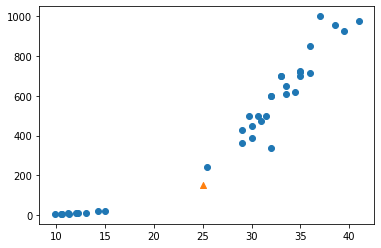

In [23]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # marker 매개변수는 모양을 지정

In [24]:
# 분명 오른쪽 위로 뻗어 다른 도미 데이터에 더 가깝지만 왜 빙어 데이터에 가깝다고 판단한건가?

In [25]:
distances, indexes = kn.kneighbors([[25, 150]])

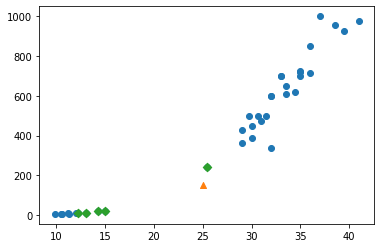

In [26]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')

In [27]:
# 마찬가지로 가장 가까운 도미가 하나 밖에 포함되지 않음

In [28]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [29]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [30]:
# 가장 가까운 생선 4개는 빙어로 결과가 빙어로 예측한 것

In [31]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [32]:
# 위 그래프와 함께 보면 x축은 범위가 좁고 y축은 범위가 넓어서 도미 샘플이 이웃으로 선택되지 못한 것

**데이터 전처리의 표준점수로 위 문제를 해결하기**

In [33]:
mean = np.mean(train_input, axis=0) # 평균 특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야함 이를 위해 axis = 0으로 함
std = np.std(train_input, axis=0) # 표준편차
# 평균을 빼고 표준편차 나눠 주기

In [34]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [35]:
train_scaled = (train_input - mean) / std

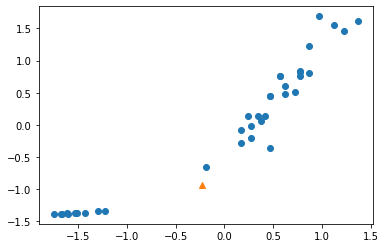

In [38]:
# 마찬가지도 25, 150 샘플을 동일한 비율로 변환해줘야 한다
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')

In [39]:
# x축과 y축의 범위가 -.15~1.5 사이로 바뀜

In [46]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [49]:
test_scaled = (test_input, mean) / std

In [52]:
print(kn.predict([new]))

[1.]
